In [47]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
from collections import defaultdict

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import copy

def addFurniture(ax, room, anchors=[1,2,3,4]):

    """
    Adds furniture in spatial plot
    """

    a = np.array([1,1,1,1,1,1])
    a_low = 0
    if room in ['testbench_01_furniture_mid', 'testbench_01_furniture_mid_concrete']:
        a[1] = a[3] = a[5] = a_low
    if room in ['testbench_01_furniture_low', 'testbench_01_furniture_low_concrete']:
        a[0] = a[2] = a[3] = a[5] = a[1] =  a_low
         # a[2] = a[0] = a_low
    if room in ['testbench_01', 'testbench_01_scenario2', 'testbench_01_scenario3']:
        a = 6*[a_low]
    furniture = [plt.Rectangle((44.+1.9, 43.1+0.2), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[0]),
                 plt.Rectangle((44.+4.45, 43.1+1), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[1]),
                 plt.Rectangle((44.+6.4, 43.1+2.6), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[2]),
                 plt.Rectangle((44.+1.7, 43.1+4.1), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[3]),
                 plt.Rectangle((44.+4.2, 43.1+3.4), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[4]),
                 plt.Rectangle((44.+5.4, 43.1+5.15), 0.5, 1, fc='orange', ec='black', lw=2, alpha=a[5]),]
    
    anchrs = [plt.Circle((57.9, 43.3), 0.2, fc='firebrick', ec='black', lw=2),
               plt.Circle((57.9, 50.0), 0.2, fc='firebrick', ec='black', lw=2),
               plt.Circle((44.3, 50.0), 0.2, fc='firebrick', ec='black', lw=2),
               plt.Circle((44.3, 43.3), 0.2, fc='firebrick', ec='black', lw=2)]

    for anchor in anchors:
        ax.add_patch(anchrs[anchor-1])
    for item in furniture:
        ax.add_patch(item)
        
def plot_rssi(room, channel, anchor_i=0, axes=None, pos_i=None, pos_j=None, rssi_map=None, vmin=None, vmax=None):

    """
    Spatial visualization for RSSI 
    """

    ax = axes[pos_i][pos_j]
    anchor = 'anchor'+str(anchor_i+1)
    # rssi_map = dt[room][anchor][channel]['H'].pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
    # rssi_map += dt[room][anchor][channel]['H'].pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(rssi_map, cmap='viridis', alpha=0.9, extent=[43.9,58.2, 43,50.3], vmin=vmin, vmax=vmax)
    plt.grid(False)
    addFurniture(ax, room, [anchor_i+1])
    a = ax.get_yticks()
    ax.set_yticks(np.concatenate((a,[a[-1]+1])))
    ax.set_xticks(ax.get_xticks()+2)
    # ax.set_xticklabels(list(range(0,15,2)))
    # ax.set_yticklabels(list(range(0,8)))
    # if pos//2 == 0:
    #     ax.set_xticks([])
    # if pos%2 == 1:
    #     ax.set_yticks([])
    ax.set_ylim(43,50.4)
    ax.set_xlim(44,58.2)
    ax.grid(False)
    return im


In [3]:
import json
import os
# os.chdir('BLE Ray-tracing Simulation Dataset')

In [54]:
#define basic values
rooms = ['testbench_01', 'testbench_01_furniture_low', 'testbench_01_furniture_mid', 'testbench_01_furniture_high']
concrete_rooms = ['testbench_01_furniture_low_concrete', 'testbench_01_furniture_mid_concrete', 'testbench_01_furniture_high_concrete']
anchors = ['anchor1', 'anchor2', 'anchor3', 'anchor4']
channels = ['37','38','39']
polarities = ['V','H']

In [55]:
datadir = 'BLE_data'

In [4]:
# #read data
# data = defaultdict(lambda: defaultdict(lambda: defaultdict (lambda: defaultdict(list))))
# anchor_data = defaultdict(lambda: defaultdict(lambda: defaultdict (lambda: defaultdict(list))))

# for room in rooms + concrete_rooms: 
#     for channel in channels:  
#         for polarity in polarities: 
             
#             tag_filename = f'{datadir}/{room}/tag_ml_export_CH{channel}_{polarity}.json'
#             tag_df = pd.read_json(tag_filename, orient='records')

#             anchor_filename = f'{datadir}/{room}/anchor_ml_export_CH{channel}_{polarity}.json'
#             anchor_df = pd.read_json(anchor_filename, orient='records')

#             df = tag_df.merge(anchor_df)

#             # remove calibration points
#             df.drop(df[(df['x_tag']==0).values | (df['y_tag']==0).values | (df['z_tag']==0).values].index, inplace=True)
            
#             for anchor in anchors:
#                 data[room][anchor][channel][polarity] = df[df['anchor']==int(anchor[-1])]
#                 anchor_data[room][anchor][channel][polarity] = anchor_df

In [276]:
df = pd.read_pickle("raw_IQ.pkl")
df.rename(columns={'true_phi': 'Ground Truth', 'pdda_phi': 'PDDA Predictions'}, inplace=True)

In [102]:
channel = '38'
anchor = 2
no_f = df[df['room'] == 'testbench_01']
no_f = no_f.loc[no_f['anchor'] == anchor]
no_f = no_f.loc[no_f['channel'] == channel]
no_f = no_f.loc[no_f['polarity'] == 'H']
no_f = no_f.reset_index(drop=True)

low = df[df['room'] == 'testbench_01_furniture_low']
low = low.loc[low['anchor'] == anchor]
low = low.loc[low['channel'] == channel]
low = low.loc[low['polarity'] == 'H']
low = low.reset_index(drop=True)

mid = df[df['room'] == 'testbench_01_furniture_mid']
mid = mid.loc[mid['anchor'] == anchor]
mid = mid.loc[mid['channel'] == channel]
mid = mid.loc[mid['polarity'] == 'H']
mid = mid.reset_index(drop=True)

high = df[df['room'] == 'testbench_01_furniture_high']
high = high.loc[high['anchor'] == anchor]
high = high.loc[high['channel'] == channel]
high = high.loc[high['polarity'] == 'H']
high = high.reset_index(drop=True)

In [285]:
no_f = df[df['room'] == 'testbench_01']
# no_f = no_f.loc[no_f['anchor'] == anchor]
high = df[df['room'] == 'testbench_01_furniture_high']
# high = high.loc[high['anchor'] == anchor]

/var/folders/l_/cjgh4zp97tx6xy5fhn4tzw9w0000gn/T/ipykernel_26398/129351439.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  rssi_map = no_f.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
/var/folders/l_/cjgh4zp97tx6xy5fhn4tzw9w0000gn/T/ipykernel_26398/129351439.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  rssi_map += no_f.pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
/var/folders/l_/cjgh4zp97tx6xy5fhn4tzw9w0000gn/T/ipykernel_26398/129351439.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  rssi_map = low.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
/var/folders/l_/cjgh4zp97tx6xy5fhn4tzw9w0000gn/T/ipykernel_26398/129351439.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  rssi_map += low.pivot('x_tag', 'y_tag'

<Figure size 1000x400 with 0 Axes>

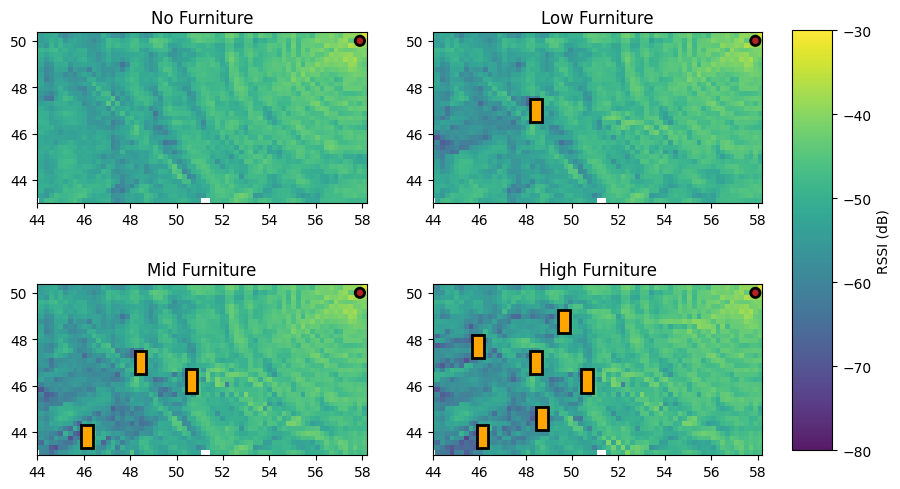

In [132]:
from copy import deepcopy
plt.figure(figsize=(10,4))
fig, axes = plt.subplots(2, 2,figsize=(10, 6))
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)
specific_rooms = ['testbench_01', 'testbench_01_low', 'testbench_01_low']
channel = '37'
anchor_i = 1
anchor = 'anchor'+str(anchor_i+1)

rssi_map = no_f.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
rssi_map += no_f.pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
im1 = plot_rssi(room='testbench_01', channel=channel, anchor_i=anchor_i, axes=axes, pos_i=0, pos_j=0,rssi_map=rssi_map, vmin=-80, vmax=-30)

rssi_map = low.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
rssi_map += low.pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
im2 = plot_rssi(room='testbench_01_furniture_low', channel=channel, anchor_i=anchor_i, axes=axes, pos_i=0, pos_j=1,rssi_map=rssi_map, vmin=-80, vmax=-30)

rssi_map = mid.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
rssi_map += mid.pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
im4 = plot_rssi(room='testbench_01_furniture_mid', channel=channel, anchor_i=anchor_i, axes=axes, pos_i=1, pos_j=0,rssi_map=rssi_map, vmin=-80, vmax=-30)


rssi_map = high.pivot('x_tag', 'y_tag', 'relative_power').values.T[::-1,:]
rssi_map += high.pivot('x_tag', 'y_tag', 'reference_power').values.T[::-1,:]
im4 = plot_rssi(room='testbench_01_furniture_high', channel=channel, anchor_i=anchor_i, axes=axes, pos_i=1, pos_j=1,rssi_map=rssi_map, vmin=-80, vmax=-30)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
axes[0][0].title.set_text('No Furniture')
axes[0][1].title.set_text('Low Furniture')
axes[1][0].title.set_text('Mid Furniture')
axes[1][1].title.set_text('High Furniture')

fig.colorbar(im2, cax=cbar_ax, label='RSSI (dB)')
plt.savefig('figures/dataset_rssi.pdf',bbox_inches='tight')

In [21]:
no_f['polarity'].values[:20]

array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype=object)

In [305]:
high[high['PDDA Predictions'] < -50].shape

(2863, 24)

In [306]:
2863+ 2090

4953

In [303]:
2562 + 1854

4416

In [307]:
4953 - 4416

537

In [299]:
100- (144/58728)*100

99.75480179812014

In [278]:
no_fs = no_f.melt(var_name=['angle'], value_vars=['Ground Truth', 'PDDA Predictions'])
high_f = high.melt(var_name=['angle'], value_vars=['Ground Truth', 'PDDA Predictions'])

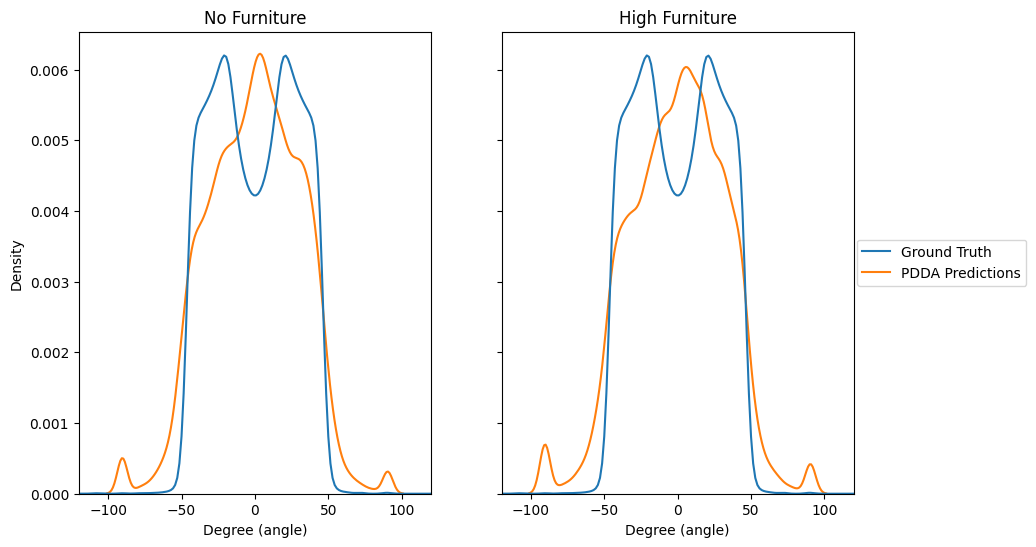

In [283]:
fig, ax =plt.subplots(1,2, sharey=True, sharex=True)

plt.xlim(-120, 120)
ax1 = sn.kdeplot(no_fs, x="value", hue='angle', ax=ax[0])
ax1.set_title(label='No Furniture')
ax1.set_xlabel('Degree (angle)')
ax1.legend_.remove()
ax2 = sn.kdeplot(high_f, x="value", hue='angle', ax=ax[1])
ax2.set_xlabel('Degree (angle)')
ax2.set_title(label='High Furniture')
# sn.move_legend(ax1, "upper right", bbox_to_anchor=(, 1), title='Species')
sn.move_legend(ax2, "center right", bbox_to_anchor=(1.51, 0.5), title='')


fig.savefig("figures/pdda_dataset.pdf", bbox_inches='tight')

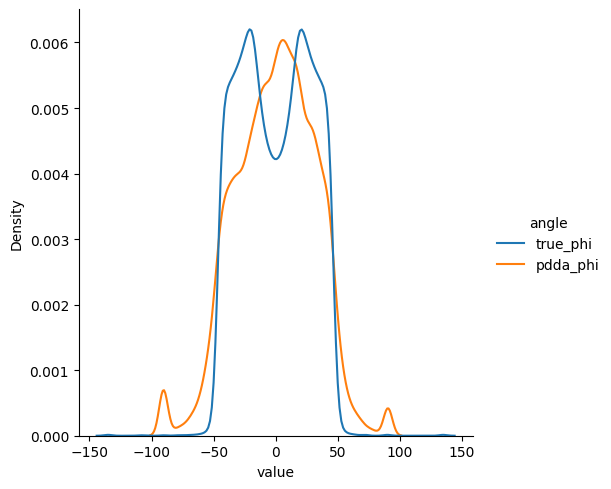

In [172]:
sn.displot(high_f, x="value", hue='angle', kind="kde")
# sn.displot(h_df, x="pdda_phi", kind="kde")

In [308]:
df = pd.read_pickle("raw_IQ.pkl")

In [ ]:
def iq_processing(data):
    
    """
    Input: Data
    Output: Processed Data

    Processing: Power Scaling, IQ shifting
    """

    cols_real = ['pdda_input_real_{}'.format(x+1) for x in range(5)]
    cols_imag = ['pdda_input_imag_{}'.format(x+1) for x in range(5)]

    iq_values = pd.DataFrame(data['pdda_input_real'].tolist(), columns=cols_real, index=data.index)
    iq_values[cols_imag] = pd.DataFrame(data['pdda_input_imag'].tolist(), columns=cols_imag, index=data.index)
    
    phase = pd.DataFrame(np.arctan2(iq_values['pdda_input_imag_1'],iq_values['pdda_input_real_1']), columns=['phase_1'])
    
    cos = np.cos(phase).values.ravel()
    sin = np.sin(phase).values.ravel()
    
    out = data.copy()
    iq_ref = np.abs(iq_values[f'pdda_input_real_1']*cos + iq_values[f'pdda_input_imag_1']*sin)
    for i in range(1,6):
        out[f'pdda_input_real_{i}'] = (iq_values[f'pdda_input_real_{i}']*cos + iq_values[f'pdda_input_imag_{i}']*sin)
        out[f'pdda_input_imag_{i}'] = (-iq_values[f'pdda_input_real_{i}']*sin + iq_values[f'pdda_input_imag_{i}']*cos)
        iq_ref +=  iq_values[f'pdda_input_real_{i}']**2 + iq_values[f'pdda_input_imag_{i}']**2

    power_norm =  StandardScaler().fit_transform((out['reference_power'] + out['relative_power']).values.reshape(-1,1))/10
    
    out.insert(25, 'power', power_norm)
    out.insert(24, 'iq_ref', iq_ref)
    out.drop(columns=['pdda_input_imag_1', 'pdda_input_real', 'pdda_input_imag'], inplace=True)
    return out

/var/folders/l_/cjgh4zp97tx6xy5fhn4tzw9w0000gn/T/ipykernel_74232/3854416888.py:208: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


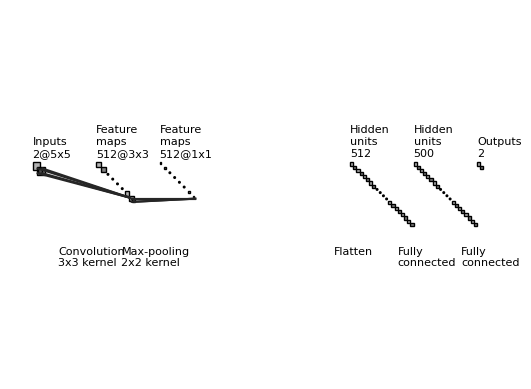

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )




    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)



def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 40
    flag_omit = True

    patches = []
    colors = []

    fig, ax = plt.subplots()


    ############################
    # conv layers
    size_list = [(5, 5), (3, 3), (1, 1)]
    num_list = [2, 512, 512]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)-1,-1,-1):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumConvMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
            num_list[ind], size_list[ind][0], size_list[ind][1]))

    ############################
    # in between layers
    start_ratio_list = [[0.1, 0.4], [1.5,1.8]]
    end_ratio_list = [[0.1, 0.4], [1.5, 1.8]]
    patch_size_list = [(3, 3), (2, 2)]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ['Convolution', 'Max-pooling']

    for ind in range(len(patch_size_list)):
        add_mapping(
            patches, colors, start_ratio_list[ind], end_ratio_list[ind],
            patch_size_list[ind], ind,
            top_left_list, loc_diff_list, num_show_list, size_list)
        label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
            patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[16, -65]
        )


    ############################
    # fully connected layers
    size_list = [(fc_unit_size, fc_unit_size)] * 3
    num_list = [512, 500, 2]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

    for ind in range(len(size_list)):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumFcMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind],
                      loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}'.format(
            num_list[ind]))

    text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    fig.set_size_inches(8, 4.5)

    fig_dir = './'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
                bbox_inches='tight', pad_inches=0)

In [ ]:
torch.Size([512, 2, 5, 5])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 1, 1])
torch.Size([512, 512])
torch.Size([512, 1024])
torch.Size([512, 1024])
torch.Size([512, 512])
torch.Size([512, 1])

In [34]:
import matplotlib
matplotlib.__version__

'3.6.0'

In [3]:
multi = pd.read_pickle('results/multichannel.pkl')
single = pd.read_pickle('results/figure3_panel1.pkl')

In [4]:
multi.head()

,testbench_01,testbench_01_furniture_low,testbench_01_furniture_mid,testbench_01_furniture_high
pdda,8.543385,8.432292,9.389305,8.860607
Linear Regression,8.115068,8.248080,8.567222,8.876190
SVR,7.706830,7.910116,8.089682,8.240463
Decision Tree,5.853511,6.228757,6.700604,6.338072
RF10,4.590026,4.736983,5.228569,5.077510


In [13]:
single.head(10)

,testbench_01,testbench_01_furniture_low,testbench_01_furniture_mid,testbench_01_furniture_high
pdda,8.543385,8.432292,9.389305,8.860607
Linear Regression,9.412078,9.568003,9.844010,10.268760
SVR,8.547875,8.643641,8.761621,9.003906
Decision Tree,6.882543,7.261287,7.606070,7.617472
RF10,5.611666,5.740991,6.253664,6.183317
XGBoost,5.643571,5.838038,6.218492,6.293050
RF100,5.413609,5.568117,5.972842,5.890732
aoanet,4.831005,4.991831,5.408162,5.551577
Modified aoanet,4.895520,5.168705,5.537297,5.588882


In [258]:
multi_cross = pd.DataFrame()
single_cross = pd.DataFrame()
both = pd.DataFrame()

In [259]:

multi_cross["RF100"] = [4.3, 3.3, 4.7, 5.1,
                                      3.1, 4.5, 4.2, 4.8,
                                      4.1, 3.8, 4.9, 4,
                                      4.6, 4.4, 4.1, 4.8]


single_cross["RF100"] = [5.4, 4.3, 5.7, 6.3,
                        4.1, 5.6, 5.2, 6,
                        5.3, 4.9, 6, 5.2,
                        5.9, 5.7, 5.2, 5.9]


multi_cross["RF10"] = [4.6, 3.6, 5, 5.5,
                        3.4, 4.7, 4.6, 5.1,
                        4.5, 4.1, 5.2, 4.4,
                        5, 4.7, 4.5, 5.1]

single_cross["RF10"] = [5.6, 4.6, 6, 6.6,
                        4.4, 5.7, 5.6, 6.4,
                        5.7, 5.2, 6.3, 5.6,
                        6.3, 6, 5.6, 6.2]


multi_cross["XGBoost"] = [4.4, 3.1, 4.7, 5.2,
                            3, 4.6, 4.1, 4.7,
                            4.1, 3.7, 5, 4,
                            4.9, 4.6, 4.1, 5]



single_cross["XGBoost"] = [5.6, 4.4, 5.9, 6.6,
                            4.2, 5.8, 5.3, 6.1,
                            5.6, 5.1, 6.2, 5.4,
                            6.2, 5.9, 5.4, 6.3]


multi_cross["Decision Tree"] = [5.9, 3.7, 6.1, 6.9,
                                3.7, 6.2, 5.2, 6.4,
                                5.2, 4.7, 6.7, 5.3,
                                6.8, 6.3, 5.4, 6.3]







single_cross["Decision Tree"] = [6.9, 4.7, 7.1, 8.2,
                            4.6, 7.3, 6.2, 7.8,
                            6.8, 6.1, 7.6, 6.6,
                            7.9, 7.5, 6.7, 7.]

In [260]:
multi_cross['dataset'] = 'multi-channel'
single_cross['dataset'] = 'single-channel'

In [261]:

both["RF100_multi-channel"] = [4.3, 3.3, 4.7, 5.1,
                                      3.1, 4.5, 4.2, 4.8,
                                      4.1, 3.8, 4.9, 4,
                                      4.6, 4.4, 4.1, 4.8]


both["RF100_single-channel"] = [5.4, 4.3, 5.7, 6.3,
                        4.1, 5.6, 5.2, 6,
                        5.3, 4.9, 6, 5.2,
                        5.9, 5.7, 5.2, 5.9]


both["RF10_multi-channel"] = [4.6, 3.6, 5, 5.5,
                        3.4, 4.7, 4.6, 5.1,
                        4.5, 4.1, 5.2, 4.4,
                        5, 4.7, 4.5, 5.1]

both["RF10_single-channel"] = [5.6, 4.6, 6, 6.6,
                        4.4, 5.7, 5.6, 6.4,
                        5.7, 5.2, 6.3, 5.6,
                        6.3, 6, 5.6, 6.2]


both["XGBoost_multi-channel"] = [4.4, 3.1, 4.7, 5.2,
                            3, 4.6, 4.1, 4.7,
                            4.1, 3.7, 5, 4,
                            4.9, 4.6, 4.1, 5]



both["XGBoost_single-channel"] = [5.6, 4.4, 5.9, 6.6,
                            4.2, 5.8, 5.3, 6.1,
                            5.6, 5.1, 6.2, 5.4,
                            6.2, 5.9, 5.4, 6.3]


both["Decision Tree_multi-channel"] = [5.9, 3.7, 6.1, 6.9,
                                3.7, 6.2, 5.2, 6.4,
                                5.2, 4.7, 6.7, 5.3,
                                6.8, 6.3, 5.4, 6.3]







both["Decision Tree_single-channel"] = [6.9, 4.7, 7.1, 8.2,
                            4.6, 7.3, 6.2, 7.8,
                            6.8, 6.1, 7.6, 6.6,
                            7.9, 7.5, 6.7, 7.]

# both[]

In [262]:
multi_cross.head()

,RF100,RF10,XGBoost,Decision Tree,dataset
0,4.3,4.6,4.4,5.9,multi-channel
1,3.3,3.6,3.1,3.7,multi-channel
2,4.7,5.0,4.7,6.1,multi-channel
3,5.1,5.5,5.2,6.9,multi-channel
4,3.1,3.4,3.0,3.7,multi-channel


In [265]:
cdf = pd.DataFrame()
cdf = pd.concat([multi_cross, single_cross])    
mdf = pd.melt(cdf, id_vars=['dataset'],var_name=['Model'])
# print(mdf.head(33))

In [266]:
mdf.shape

(128, 3)

In [267]:
mdf = mdf[mdf['value'].notna()]

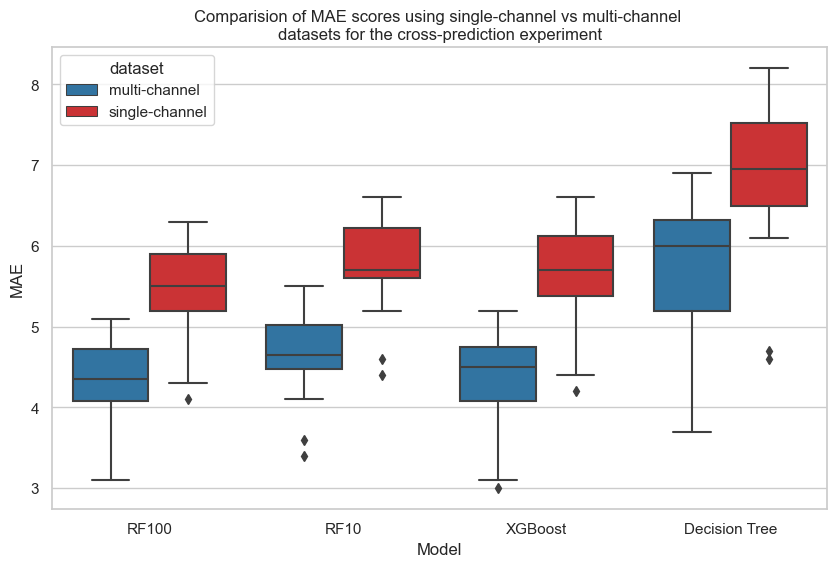

In [268]:
# my_colors = ["blue", "red"]
# sns.set_palette(sns.color_palette(my_colors))
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10, 6))
palette = ["blue","red"]

sns.set_style("whitegrid")


ax = sns.boxplot(x="Model", y="value", data=mdf, palette=["#1f78b4",'#e31a1c'], hue='dataset')

# sns.despine()
# Customize the axes and title
ax.set_title("Comparision of MAE scores using single-channel vs multi-channel \ndatasets for the cross-prediction experiment")
# ax.set_xlabel("day")
ax.set_ylabel("MAE")
# plt.subplots_adjust(hspace = 0.8)

# blue_patch = mpatches.Patch(color='#1f78b4',facecolor='#1f78b4', label='The blue data')
# red_patch = mpatches.Patch(color='#e31a1c', facecolor='#e31a1c', label='The red data')
# # plt.legend(handles=[blue_patch,red_patch])

plt.legend(title='dataset')
# ax.legend(handles=[blue_patch,red_patch])
# plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
plt.savefig("figures/sizes/comparision_single_multi.pdf", bbox_inches='tight')
plt.savefig('figures/sizes/comparision_single_multi.png',format="png")
plt.show()

In [272]:
adaptive_cross = pd.DataFrame()
single_cross = pd.DataFrame()

In [274]:
# adaptive_cross.describe()

In [275]:
# single_cross.mean()

In [276]:
adaptive_cross["RF100"] = [5.5, 4.2, 5.6, 6.2,
                        4.1, 5.6, 5.1, 5.8,
                        5.2, 4.8, 6, 5.1,
                        5.8, 5.6, 5.1, 6]


single_cross["RF100"] = [5.4, 4.3, 5.7, 6.3,
                        4.1, 5.6, 5.2, 6,
                        5.3, 4.9, 6, 5.2,
                        5.9, 5.7, 5.2, 5.9]


adaptive_cross["RF10"] = [5.6, 4.3, 5.6, 6.3,
                            4.2, 5.5, 5.2, 6,
                            5.3, 4.9, 5.9, 5.2,
                            6, 5.7, 5.3, 6.1]

single_cross["RF10"] = [5.6, 4.6, 6, 6.6,
                        4.4, 5.7, 5.6, 6.4,
                        5.7, 5.2, 6.3, 5.6,
                        6.3, 6, 5.6, 6.2]


adaptive_cross["XGBoost"] = [5.6, 4.2, 5.6, 6.1,
4, 5.7, 5.1, 5.9,
5.2, 4.7, 6.1, 5.2,
5.8, 5.6, 5.2, 6]



single_cross["XGBoost"] = [5.6, 4.4, 5.9, 6.6,
                            4.2, 5.8, 5.3, 6.1,
                            5.6, 5.1, 6.2, 5.4,
                            6.2, 5.9, 5.4, 6.3]


adaptive_cross["Decision Tree"] = [6.7, 4.2, 6.7, 7.3,
4.1, 7, 5.7, 7.3,
6.3, 5.4, 7.4, 5.9,
7.1, 6.6, 6.1, 7.5]







single_cross["Decision Tree"] = [6.9, 4.7, 7.1, 8.2,
                            4.6, 7.3, 6.2, 7.8,
                            6.8, 6.1, 7.6, 6.6,
                            7.9, 7.5, 6.7, 7.]

In [285]:
adaptive_cross['dataset'] = 'adaptive learning'
single_cross['dataset'] = 'cross-prediciton'

In [286]:
cdf.head()

,RF100,RF10,XGBoost,Decision Tree,dataset
0,5.5,5.6,5.6,6.7,adaptive-single-channel
1,4.2,4.3,4.2,4.2,adaptive-single-channel
2,5.6,5.6,5.6,6.7,adaptive-single-channel
3,6.2,6.3,6.1,7.3,adaptive-single-channel
4,4.1,4.2,4.0,4.1,adaptive-single-channel


In [287]:
cdf = pd.DataFrame()
cdf = pd.concat([adaptive_cross, single_cross])    
mdf = pd.melt(cdf, id_vars=['dataset'],var_name=['Model'])
# print(mdf.head(33))

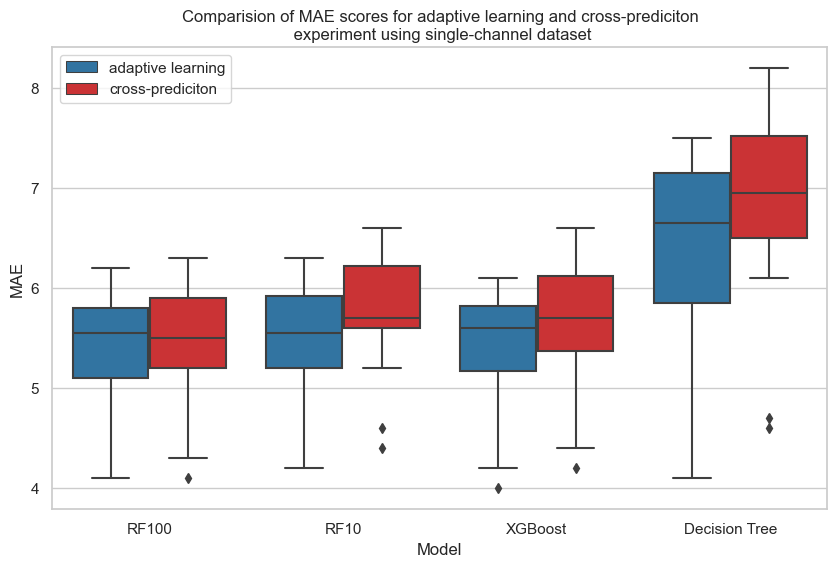

In [291]:
# my_colors = ["blue", "red"]
# sns.set_palette(sns.color_palette(my_colors))
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10, 6))
palette = ["blue","red"]

sns.set_style("whitegrid")


ax = sns.boxplot(x="Model", y="value", data=mdf, palette=["#1f78b4",'#e31a1c'], hue='dataset')

# sns.despine()
# Customize the axes and title
ax.set_title("Comparision of MAE scores for adaptive learning and cross-prediciton\n experiment using single-channel dataset")
# ax.set_xlabel("day")
ax.set_ylabel("MAE")
# plt.subplots_adjust(hspace = 0.8)

# blue_patch = mpatches.Patch(color='#1f78b4',facecolor='#1f78b4', label='The blue data')
# red_patch = mpatches.Patch(color='#e31a1c', facecolor='#e31a1c', label='The red data')
# # plt.legend(handles=[blue_patch,red_patch])

plt.legend(title='')
# ax.legend(handles=[blue_patch,red_patch])
# plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
plt.savefig("figures/sizes/comparision_single_adaptive.pdf", bbox_inches='tight')
plt.savefig('figures/sizes/comparision_single_adaptive.png',format="png")
plt.show()